<a href="https://colab.research.google.com/github/ljs7463/YOLO/blob/master/%EC%84%A0%EC%88%98%EA%B3%BC%EC%A0%95/openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#opencv#
#### 1. 이미지 읽어서 살펴보기 ####

cv2.imread(file_name, flag)  :  이미지를 읽어 Numpy 객체로 만드는 함수
- file_name: 읽고자 하는 이미지 파일
- flag: 이미지를 읽는 방법 설정

 - IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
 - IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
 - IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)

 반환 값: Numpy 객체 (행, 열, 생상: 기본 BGR)


cv2.imshow(title, image)  :  특정한 이미지를 화면에 출력합니다. (어떤 제목으로 어떤 이미지를 출력할지 설정하는것)
 - title : 윈도우 창의 제목
 - image : 출력할 이미지 객체


cv2.imwrite(file_name, image)  :  특정한 이미지를 파일로 저장하는 함수
 - file_name : 저장할 이미지 파일 이름
 - image : 저장할 이미지 객체

cv2.waitKey(time)  :  키보드 입력을 처리하는 함수
 - time: 입력 대기 시간(무한대기: 0)

 반환 값: 사용자가 입력한 Ascii code (ESC: 27)


cv2.destroyAllWindows()  :  화면의 모든 윈도우를 닫는 함수  (파이참 에서)


###코랩에서 실행###

In [1]:
from google.colab import files
uploaded= files.upload()

Saving 증명사진.jpg to 증명사진.jpg


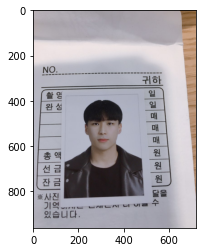

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('증명사진.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

(1) 
opencv(BGR)와 matplotlib(RGB)의 색 구조 가 다르기때문에 꼭 코드를 입력해야 한다.

(2) 
import cv2

import matplotlib.pyplot as plt

그림BGR = cv2.imread("그림파일.jpg")
그림RGB = cv2.cvtColor(그림BGR, cv2.COLOR_BGR2RGB)

(3) 
cv2.cvtColor(원본 이미지, 색상 변환 코드)를 이용하여 이미지의 색상 공간을 변경할 수 있습니다.
색상 변환 코드는 원본 이미지 색상 공간2결과 이미지 색상 공간을 의미합니다.
원본 이미지 색상 공간은 원본 이미지와 일치해야합니다.
Tip : BGR은 RGB 색상 채널을 의미합니다. 



### openCV 이미지 연산###


In [3]:
# 이미지 크기 및 픽셀 확인
import cv2
image = cv2.imread('증명사진.jpg')

print(image.shape)
print(image.size)

(961, 720, 3)
2075760


In [4]:
# 이미지 Numpy 객체의 특정 픽셀을 가리킵니다.
px = image[100, 100]

# B, G, R 순서로 출력됩니다.(openCV)
# (단, Gray Scale인 경우에는 B, G, R,로 구분되지 않습니다.)

print(px)

# R 값만 출력하기
print(px[2])

[177 171 176]
176


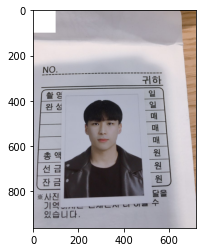

In [5]:
# OpenCV를 활용한 특정 범위 픽셀 변경
import cv2
import matplotlib.pyplot as plt 



image = cv2.imread('증명사진.jpg')

# (1) 첫번째 방법

for i in range(0, 100):
    for j in range(0, 100):
        image[i,j] = [255,255,255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



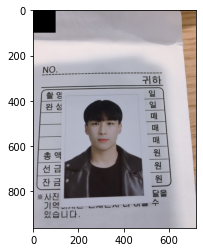

In [6]:
import cv2
import matplotlib.pyplot as plt 


image = cv2.imread('증명사진.jpg')

#  (2) 두번째 방법

image[0:100, 0:100] =  [0, 0, 0]


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#당연히 시간은 두번째 것이 더 빠르다

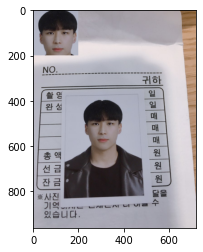

In [7]:
# openCV를활용한 ROI(Region of Interest:관심 있는 영역) 추출
# 컴퓨터 비전에서 관심이란 유의미한 feature가 들어있는 공간을 의미
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('증명사진.jpg')
ROI= image[400:600, 200:400] # 이미지는 행렬
image[0:200,0:200] =ROI
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

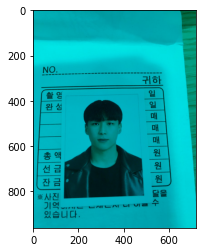

In [8]:
#  openCV를 활용한 픽셀별 색상 다루기
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('증명사진.jpg')
image[:, :, 2] = 0  # R값을 0으로

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

openCV를 활용한 이미지 변형

## 이미지 크기 조절 ##
cv2.resize(image, dsize, fx, fy, interpolation)  :  이미지 크기를 조절한다.
 - dsize : Manual size (결과 이미지 크기(튜플))
 - fx : 가로 비율
 - fy : 세로 비율
 - interpolation : 보간법
  - INTER_CUBIC : 사이즈를 크게 할 때 주로 사용
  - INTER_AREA : 사이즈를 작게 할 때 주로 사용
 
 보간법은 사이즈가 변할 때 픽셀 사이의 값을 조절하는방법 을 의미한다.

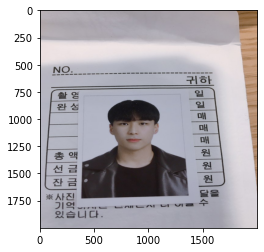

In [9]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('증명사진.jpg',cv2.IMREAD_COLOR)
expend = cv2.resize(img, (2000,2000), fx = 1, fy = 1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expend,cv2.COLOR_BGR2RGB))
plt.show()



### 이미지 위치 변경 ###
cv2.warpAffine(image, M, dsize) : 이미지 위치를 변환시킴
  - M : 변환행렬
  - dsize : Manual size (결과 이미지 크기)

#### 변환 행렬과 반환 ####

[M11 M12 M13]
                      
[M21 M22 M23]           (a, b)

(M11*a + M12 *b + M13, M21*a + M22*b + M23)

단순히 이미지의 위치를 변경할 때 변환 행렬은

[1 0 tx]

[0 1 ty] (a,b)

(a + tx,b + ty)
즉, 기존 좌표 a,b에서 가로로 tx만큼 세로로 ty만큼 이동

변환행렬은 2 x 3 의 이차원 행렬입니다. [[1,0,x축이동],[0,1,y축이동]] 형태의 float32type의 numpy array입니다.

형태: M = np.float32([1,0,x축이동],[0,1,y축이동])


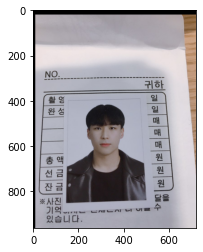

In [10]:
import numpy as np

img = cv2.imread('증명사진.jpg')
height, width = img.shape[:2]
M = np.float32([[1,0,10],[0,1,20]])
mimg = cv2.warpAffine(img, M,(width,height))
plt.imshow(cv2.cvtColor(mimg,cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 회전 ###
cv2.getRotationMatrix2D(center, angle, scale) : 이미지 회전을 위한 변환 행렬을 생성하는  함수.
 - center : 회전중심
 - angle : 회전각도
 - scale : Scale Factor(크기) 
 

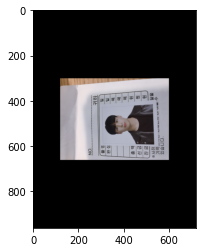

In [11]:
img = cv2.imread('증명사진.jpg')
M = cv2.getRotationMatrix2D((width/2,height/2), 90, 0.5)
height,width = img.shape[:2]
nimg = cv2.warpAffine(img,M,(width,height))
plt.imshow(cv2.cvtColor(nimg, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 합치기 ###
1. cv2.add() : Saturation연산을 수행한다.
  - 0보다 작으면 0, 255보다 크면 255로 표현
2. np.add() : Modulo 연산을 수행한다.
  - 256은 0 , 257은 1로 표현

주로 1번을 많이 한다. 2번은 특정한 픽셀에 255가 넘어가서 0으로 시작되기 때문에


## openCV 임계점 처리하기 ##

#### 이미지의 기본 ***이진화*** (흑과 백 으로 나누겠다)

cv2.threshold(image, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수
  - image : 처리할 Gray Scale 이미지
  - thresh : 임계 값 (전체 픽셀에 적용)
  - max_value : 임계 값을 넘었을 때 적용할 값
  - type : 임계점을 처리하는 방식

    - 1) THRESH_BINARY : 임계 값 보다 크면 max_value, 작으면0

    - 2) THRESH_BINARY_INV : 임계 값보다 작으면 max_value, 크면 0

    - 3) THRESH_TRUNC : 임계 값보다 크면 임계 값, 작으면 그대로

    - 4) THRESH_TOZERO : 임계 값보다 크면 그대로, 작으면 0

    - 5) THRESH_TOZERO_INV : 임계 값보다 크면0, 작으면 그대로

    thresh 값을 초과하면 max_value값으로 넣어주겠다

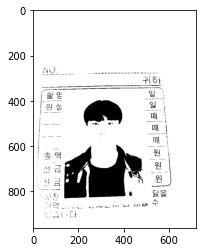

50.0


In [12]:

image =cv2.imread('증명사진.jpg',cv2.IMREAD_GRAYSCALE)
ret, img= cv2.threshold(image,50, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

print(ret)

# 2번째 줄 풀이: ret과 img에 알고리즘에 의한 임계값과 이미지결과를 각각의 변수에 받는다.(cv2.threshold 함수의 경우 OTSU 알고리즘에 의한 임계값과 그 영상 두개가 반환됩니다)


### 이미지의 적응 임계점 처리 ###
  - 하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋다. (즉, 여러 임계점 적용)

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C) : 적응 계점 처리 함수
  - max_value : 임계 값을 넘었을 때 적용할 값
  - adaptive_method : 임계 값을 결정하는 계산 방법
  
  ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
  
  ADAPTIVE_THRESH_GAUSSIAN_C
  - type : 임계 값을 처리하는 방식
  - block_size : 임계 값을 적용할 영역의 크기
  - C : 평균이나 가중 평균에서 차감할 값
Adaptive Threshold를 이용하면,전체 픽셀을 기준으로 임계 값을 적용하지 않습니다. 즉 특정영역마다 다른 픽셀값을 사용하게 할 수 있다.



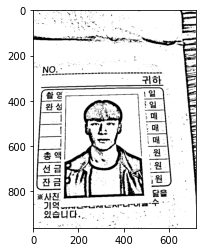

In [13]:
image = cv2.imread('증명사진.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

### opencv Tracker ###
Tracker 사용방법 (트렉커바란 사용자가 바를 이리저리 움직여 보면서 값 을 편하게 바꿔볼 수 있는 기능)

cv2.createTrackbar(track_bar_name, window_name, value, count, on_change) : Tracker를 생성하는 함수
   - value : 초기 값
   - count : Max 값(Min:0)
   - on_change: 값이 변경될 때 호출되는 Callback 함수


In [14]:

# import cv2
# import numpy as np

# def change_color(x):
#    r = cv2.getTrackbarPos("R", "Image")
#    g = cv2.getTrackbarPos("G", "Image")
#    b = cv2.getTrackbarPos("B", "Image")
#    image[:] = [b, g, r]
#    cv2.imshow('Image', image)

# image = np.zeros((600, 400, 3))
# cv2.namedWindow("Image")

# cv2.createTrackbar("R", "Image", 0, 255, change_color)
# cv2.createTrackbar("G", "Image", 0, 255, change_color)
# cv2.createTrackbar("B", "Image", 0, 255, change_color)

# cv2.imshow('Image', image)
# cv2.waitKey(0)



### openCV 도형 그리기 ###

직선 그리기

cv2.line(image, start, end, color, thickness) : 하나의 직선을 그리는 함수

  - start : 시작 좌표(2차원)
  - end : 종료 좌표(2차원)
  - thickness : 선의 두께


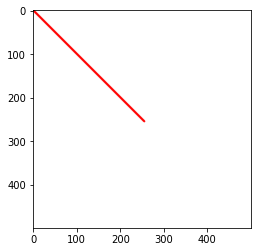

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((500, 500,3), 255, np.uint8)  # np.full((x,y),z) -> z를 x,y만큼 채움
image1 = cv2.line(image, (0, 0), (255, 255), (255, 0, 0), 3)

plt.imshow(image1)
plt.show()

#### 하나의 사각형 그리기 ####


cv2.rectangle(image, start, end, color, thickness) : 하나의 사격형을 그리는 함수
   - start : 시작 좌표(2차원)
   - end : 종료 좌표(2차원)
   - thickness : 선의 두께(채우기:-1) (선의두께에 -1 을 설정하면 내부를 채우게 가능)



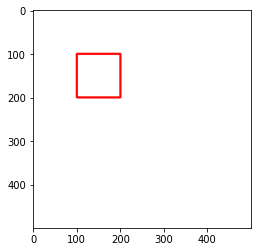

In [16]:
image = np.full((500, 500, 3), 255, np.uint8)
img= cv2.rectangle(image,(100,100),(200,200),(255,0,0),3) #사진이 아니므로 x,y
plt.imshow(img)
plt.show()

#### 원 그리기 ####
cv2.circle(image, center, radian, color, thickness) :하나의 원을 그리는 함수

  - center : 원의 중심(2차원)
  - radian : 반지름
  - thickness : 선의 두께 (채우기: -1)

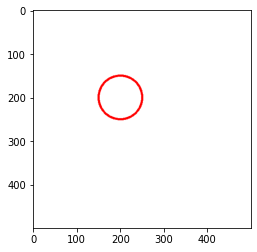

In [17]:
image = np.full((500,500,3),255, np.uint8)
img = cv2.circle(image, (200,200),50,(255,0,0),3)
plt.imshow(img)
plt.show()

#### 다각형 그리기 ####
cv2.polylines(image, points, is_closed, color, thickness) : 하나의 다각형을 그리는 함수
   - points : 꼭지점들
   - is_closed : 닫힌 도형 여부
   - thickness : 선의 두께(채우기: -1)



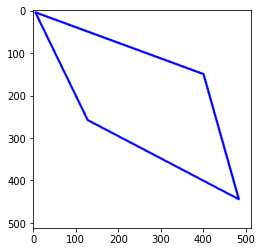

[[  5   5]
 [128 258]
 [483 444]
 [400 150]]


In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[5, 5], [128, 258], [483, 444], [400, 150]])
image = cv2.polylines(image, [points], True, (0, 0, 255), 4)

plt.imshow(image)
plt.show()
print(points)

### 텍스트 그리기 ###
cv2.putText(Image, text, position, font_type, font_scale,color) : 하나의 텍스트를 그리는 함수
   - position : 텍스트가 출력될 위치
   - font_type : 글씨체
   - font_scale : 글씨 크기 가중치


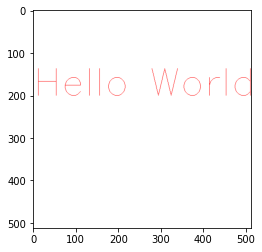

In [19]:
image = np.full((512, 512, 3), 255, np.uint8)
image =cv2.putText(image, 'Hello World', (0, 200), cv2.FONT_ITALIC, 3, (255, 0, 0))

plt.imshow(image)
plt.show()


### Contours찾기(그림안에서 어떤 사물의 외각(테두리)을 찾는것) ###
cv2.findContours(image, mode, method) : 이미지 에서 Contour들을 찾는 함수
- mode : Contour들을 찾는 방법

  - RETR_TREE : 모든Line을 찾으며, 모든 Hierarchy 구성 ㅇ (RETR=retrieve)

  - RETR_LIST : 모든Line을 찾지만, Hierarchy 구성 x

  - RETR_EXTERNAL : 바깥쪽 Line만 찾기

- method : Contour들을 찾는 근사치 방법(컨투어.jpg)

  - CHAIN_APPROX_NONE : 모든 Contour포인트 저장

  - CHAIN_APPROX_SIMPLE: Contour Line을 그릴 수 있는 포인트만 저장

***입력 이미지는 Grayscale Threshold 전처리 과정이 필요합니다.***




### Contours 그리기 ###

cv2.drawContours(image, contours, contour_index, color, thickness) : Contour들을 그리는 함수
- contour_index: 그리고자 하는 Contours Line( 전체: -1)

#####

**컨투어를 찾는 findContours 함수에서는 image를 불러올때 binary로 전처리 된 이미지를 불러 와야하지만 컨투어를 그리는 drawContours 함수를 사용 할 때에는 
처음 업로드한 칼라이미지를 사용한다.**

In [20]:
from google.colab import files
uploaded = files.upload()


Saving 증명사진.jpg to 증명사진 (1).jpg


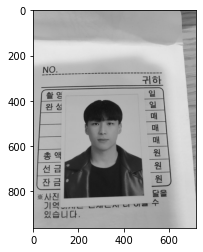

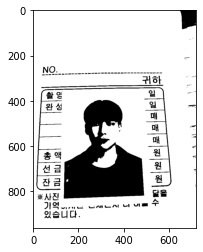

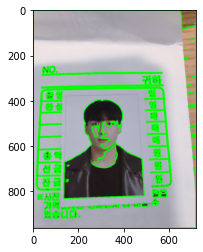

In [21]:
import cv2
import matplotlib.pyplot as plt


image_color = cv2.imread('증명사진.jpg')
image_gray = cv2.cvtColor(image_color,cv2.COLOR_BGR2GRAY)
ret, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)  #흰색과 검은색으로 이루어진 바이너리 이미지

plt.imshow(cv2.cvtColor(image_gray,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]# findcontours를 이용해서 컨투어를 추출할때는 추출한거에서 인덱스 0 즉, 첫번째 인덱스가 컨투어에 해당
image_color = cv2.drawContours(image_color, contours, -1,  (0, 255, 0),3) #-1은 모든 컨투어 그리는거고 0은 첫번째 컨투어만 그리는것/컨투어를 그릴때는 컬러이미지를 불러와서해야함

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.show()


### openCV Contours처리 ###
Contour의 사각형 외각 찾기

cv2.boundingRect(contour)  :  Contour를 포함하는 사각형을 그립니다.
사각형의 X, Y 좌표와 너비, 높이를 반환합니다.

In [22]:
from google.colab import files
uploaded = files.upload()

Saving digitimage.jpg to digitimage.jpg


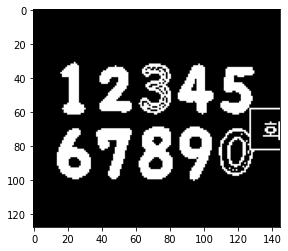

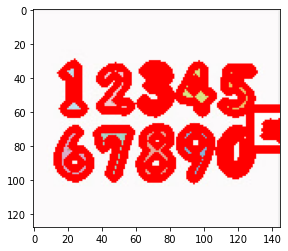

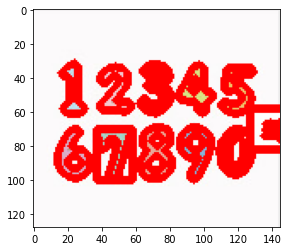

In [23]:
import cv2
import matplotlib.pyplot as plt

image_color = cv2.imread('digitimage.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
ret, image_binary = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY)
image_binary = cv2.bitwise_not(image_binary) # 하얀색과 검정석 반전을 시키는 코드 bitwise_not(),findContours값은 threshold값을 넣었을때 하얀색값을 추출하기때문

plt.imshow(cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(image_binary, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)[0]
image_color = cv2.drawContours(image_color, contours,-1,(0,0,255),3)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)) #왜 여기 기존에 BGR인지 생각해보기
plt.show()

contour = contours[0] #첫번째 컨투어를 지정
x, y, w, h = cv2.boundingRect(contour)
image_color = cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.show()




### contour의 Convex Hull ###

cv2.convexHull(contour)  :  convexHull 알고리즘으로 외각을 구하는 함수
대략적인 형태의 Contour 외각을 빠르게 구할 수 있습니다.(단일 Contour반환)
#### 여러개의 벡터(점) 들이 있을때 그 중에서 외각에 있는 것만 찾고자 할 때 사용하는 알고리즘 ####

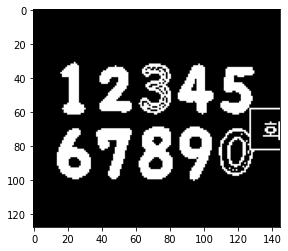

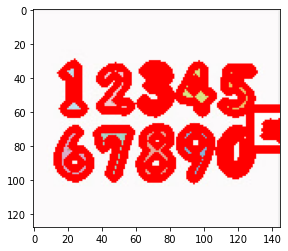

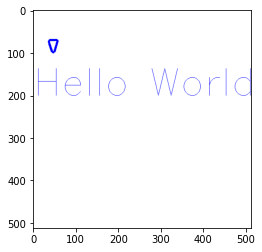

In [24]:
import cv2
import matplotlib.pyplot as plt

image_color = cv2.imread('digitimage.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
ret, image_binary = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY)
image_binary = cv2.bitwise_not(image_binary) # 하얀색과 검정석 반전을 시키는 코드 bitwise_not(),findContours값은 threshold값을 넣었을때 하얀색값을 추출하기때문

plt.imshow(cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(image_binary, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)[0]
image_color = cv2.drawContours(image_color, contours,-1,(0,0,255),3)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)) #왜 여기 기존에 BGR인지 생각해보기
plt.show()

# contour = contours[0] #첫번째 컨투어를 지정
# x, y, w, h = cv2.boundingRect(contour)
# image_color = cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 0, 255), 3)

# plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
# plt.show()

contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from google.colab import files
uploade = files.upload()

Saving motivation.mp4 to motivation.mp4


In [25]:
# 영상 다루기
# camera로 부터 영상 재생
import cv2
cap = cv2.VideoCapture('C:/Users/ljs74/OneDrive/문서/Bandicam/motivation')
print(cap)

<VideoCapture 0x7f9ac911fdb0>
